In [1]:
import aplpy
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.convolution import convolve_fft, Gaussian2DKernel
import math 
from astropy import units as u
from scipy.interpolate import UnivariateSpline
import scipy.optimize as optimize
from scipy.interpolate import interp1d
import sys

In [166]:
!pwd

/Users/hannahkoziol/Research


In [2]:
sys.path.insert(1, '/Users/hannahkoziol/Dropbox/Research/python_modules/plfit')
import plfit

In [3]:
from numpy.random import rand,seed

In [13]:
sim_B1_000 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/n_dens_pbcor/N_dens_feather10_B1_000_clean14_1_pbcor.fits')
sim_data_B1_000 = sim_B1_000[0].data
column_density_array_B1_000_after = sim_data_B1_000
flat_column_density_B1_000_after = column_density_array_B1_000_after.flatten()
original_sim_B1_000 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/N_dens/N_dens_B1snap_000.fits')
original_data_B1_000 = original_sim_B1_000[0].data * 10 
column_density_array_B1_000_before = original_data_B1_000/(1e4)
flat_column_density_B1_000_before = column_density_array_B1_000_before.flatten()

sim_B1_051 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/n_dens_pbcor/N_dens_feather10_B1_051_clean14_pbcor.fits')
sim_data_B1_051 = sim_B1_051[0].data
column_density_array_B1_051_after = sim_data_B1_051
flat_column_density_B1_051_after = column_density_array_B1_051_after.flatten()
original_sim_B1_051 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/N_dens/N_dens_B1snap_051.fits')
original_data_B1_051 = original_sim_B1_051[0].data * 10 
column_density_array_B1_051_before = original_data_B1_051/(1e4)
flat_column_density_B1_051_before = column_density_array_B1_051_before.flatten()

sim_B10_000 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/n_dens_pbcor/N_dens_feather10_B10_000_clean14_pbcor.fits')
sim_data_B10_000 = sim_B10_000[0].data
column_density_array_B10_000_after = sim_data_B10_000
flat_column_density_B10_000_after = column_density_array_B10_000_after.flatten()
original_sim_B10_000 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/N_dens/N_dens_B10snap_000.fits')
original_data_B10_000 = original_sim_B10_000[0].data * 10 
column_density_array_B10_000_before = original_data_B10_000/(1e4)
flat_column_density_B10_000_before = column_density_array_B10_000_before.flatten()

sim_B10_066 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/n_dens_pbcor/N_dens_feather10_B10_066_clean14_pbcor.fits')
sim_data_B10_066 = sim_B10_066[0].data
column_density_array_B10_066_after = sim_data_B10_066
flat_column_density_B10_066_after = column_density_array_B10_066_after.flatten()
original_sim_B10_066 = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/N_dens/N_dens_B10snap_066.fits')
original_data_B10_066 = original_sim_B10_066[0].data * 10 
column_density_array_B10_066_before = original_data_B10_066/(1e4)
flat_column_density_B10_066_before = column_density_array_B10_066_before.flatten()

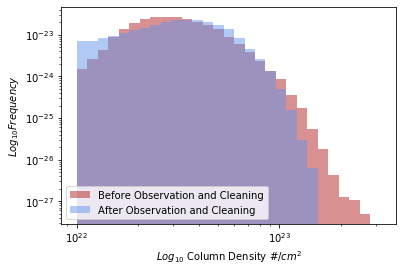

In [5]:
fig, ax = plt.subplots()
before_hist = plt.hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.5)
after_hist = plt.hist(flat_column_density_B1_000_after, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.5)
#plt.axvline(x = 5.01643155e+22, label = 'x_min before', linestyle = ':', color = 'green')
#plt.axvline(x = 6.35348e+22, label = 'x_min after', linestyle = ':', color = 'orange')
ax.set_xscale('log')
plt.xlabel('$Log_{10}$ Column Density $\#/cm^2$')
plt.ylabel('$Log_{10} Frequency$')
plt.legend(loc = 'lower left')
plt.show()

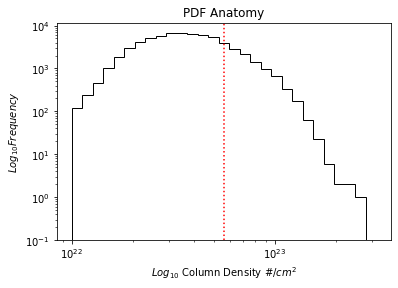

In [6]:
fig, ax = plt.subplots()
before_hist = plt.hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, color='black', alpha=0.99)
ax.set_xscale('log')
plt.axvline(x = 5.63403e+22, linestyle = ':', color = 'red')
plt.xlabel('$Log_{10}$ Column Density $\#/cm^2$')
plt.ylabel('$Log_{10} Frequency$')
ax.set_title('PDF Anatomy')
plt.show()

/Users/hannahkoziol/Dropbox/Research/python_modules/plfit/plfit/plfit.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  a = 1+float(n) / sum(log(x/xmin))


PYTHON plfit executed in 74.623580 seconds
xmin: 8.50526e+22 n(>xmin): 2773 alpha: 6.05246 +/- 0.0959462   Log-Likelihood: -145238   ks: 0.0189677 p(ks): 0.134264
Fitting done
Plot 1 done
Plot 2 done
Plot 3 done


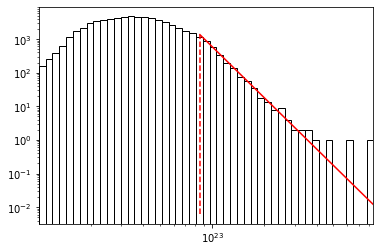

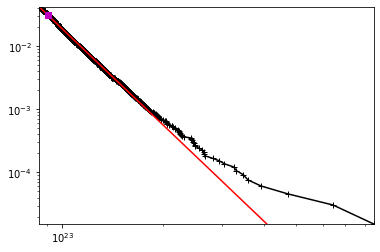

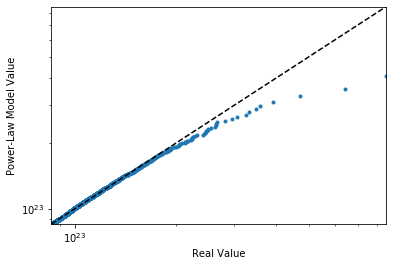

In [46]:
myplfit_B1_051_before_xmin=plfit.plfit(flat_column_density_B1_051_before[(flat_column_density_B1_051_before>=1e22)], discrete = False, usefortran=False)
print('Fitting done')
from pylab import *
figure(1)
myplfit_B1_051_before_xmin.plotpdf()
ax = plt.gca()
#ax.set_xlim(1e22, 4e23)
#ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_B1_051_before_xmin.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_B1_051_before_xmin.plotppf()
print('Plot 3 done')

In [ ]:
myplfit_B1_051_after_xmin=plfit.plfit(flat_column_density_B1_051_after[(flat_column_density_B1_051_after>=1e22)], xmin = 5.64290868e+22, discrete = False, usefortran=False)
print('Fitting done')
from pylab import *
figure(1)
myplfit_B1_051_after_xmin.plotpdf()
ax = plt.gca()
#ax.set_xlim(1e22, 4e23)
#ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_B1_051_after_xmin.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_B1_051_after_xmin.plotppf()
print('Plot 3 done')

xmin: 5.64291e+22 n(>xmin): 10611 alpha: 4.54804 +/- 0.0344438   Log-Likelihood: -556045   ks: 0.0387182 p(ks): 1.4719e-14
Fitting done
Plot 1 done
Plot 2 done
Plot 3 done


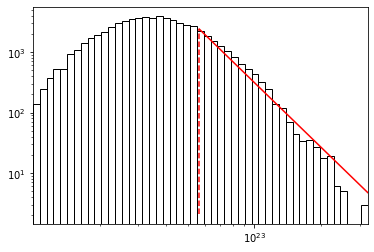

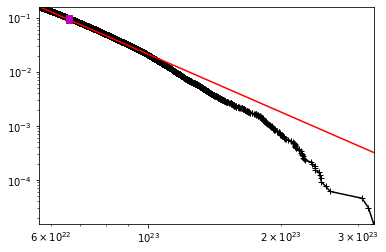

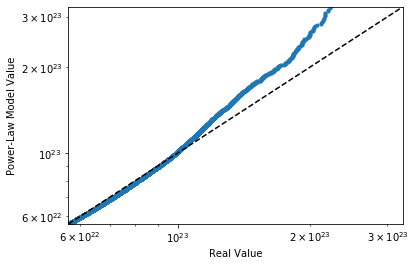

In [7]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_B10_066_before_xmin=plfit.plfit(flat_column_density_B10_066_before[(flat_column_density_B10_066_before>=1e22)], xmin = 5.64290868e+22, discrete = False, usefortran=False)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_B10_066_before_xmin.plotpdf()
ax = plt.gca()
#ax.set_xlim(1e22, 4e23)
#ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_B10_066_before_xmin.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_B10_066_before_xmin.plotppf()
print('Plot 3 done')

The lowest value included in the power-law fit,  xmin: 6.35348e+22 
The number of values above xmin,  n(>xmin): 7384 
The derived power-law alpha (p(x)~x^-alpha) with MLE-derived error,  alpha: 5.51847 +/- 0.0525831   
The log of the Likelihood (the maximized parameter; you minimized the negative log likelihood),  Log-Likelihood: -385585   
The KS-test statistic between the best-fit power-law and the data,  ks: 0.0624842  occurs with probability   p(ks): 8.3208e-26
Fitting done
Plot 1 done
Plot 2 done
Plot 3 done


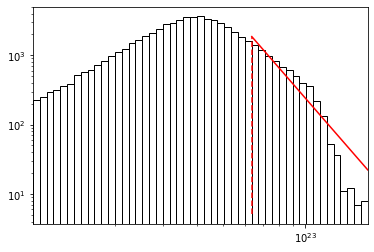

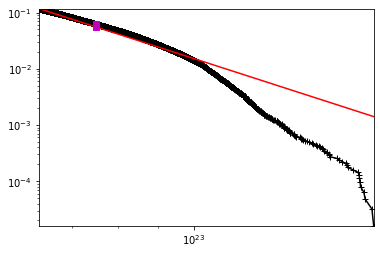

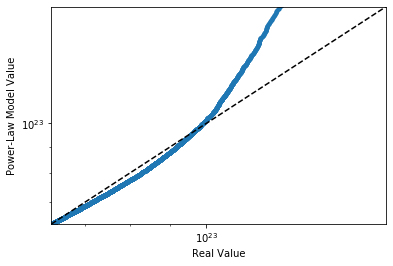

In [14]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_B10_066_after_xmin=plfit.plfit(flat_column_density_B10_066_after[(flat_column_density_B10_066_after>=1e22)], xmin = 6.35348022e+22, discrete = False, usefortran=False, verbose = True)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_B10_066_after_xmin.plotpdf(nbins=50)
ax = plt.gca()
#ax.set_xlim(1e22, 4e23)
#ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_B10_066_after_xmin.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_B10_066_after_xmin.plotppf()
print('Plot 3 done')

The lowest value included in the power-law fit,  xmin: 5.63403e+22 
The number of values above xmin,  n(>xmin): 10454 
The derived power-law alpha (p(x)~x^-alpha) with MLE-derived error,  alpha: 4.84754 +/- 0.0376307   
The log of the Likelihood (the maximized parameter; you minimized the negative log likelihood),  Log-Likelihood: -546725   
The KS-test statistic between the best-fit power-law and the data,  ks: 0.0549556  occurs with probability   p(ks): 3.49021e-28
Fitting done
Plot 1 done
Plot 2 done
Plot 3 done


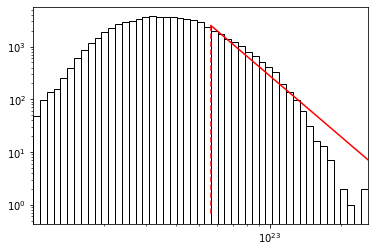

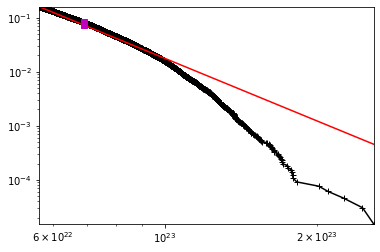

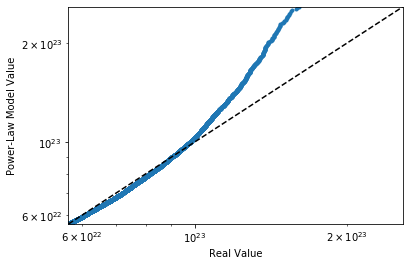

In [15]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_B1_000_before=plfit.plfit(flat_column_density_B1_000_before[(flat_column_density_B1_000_before>=1e22)], xmin = 5.63402677e+22, discrete = False, usefortran=False, verbose = True)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_B1_000_before.plotpdf()
ax = plt.gca()
#ax.set_xlim(1e22, 1e23)
#ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_B1_000_before.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_B1_000_before.plotppf()
print('Plot 3 done')

The lowest value included in the power-law fit,  xmin: 6.34663e+22 
The number of values above xmin,  n(>xmin): 7124 
The derived power-law alpha (p(x)~x^-alpha) with MLE-derived error,  alpha: 6.54487 +/- 0.0656946   
The log of the Likelihood (the maximized parameter; you minimized the negative log likelihood),  Log-Likelihood: -370250   
The KS-test statistic between the best-fit power-law and the data,  ks: 0.0584314  occurs with probability   p(ks): 6.93453e-22
Fitting done
Plot 1 done
Plot 2 done
Plot 3 done


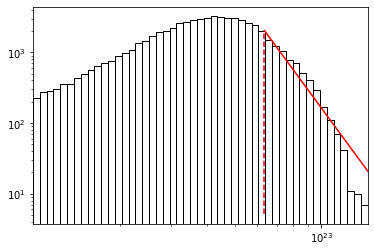

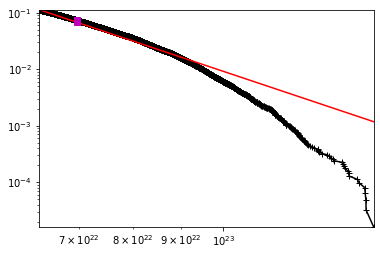

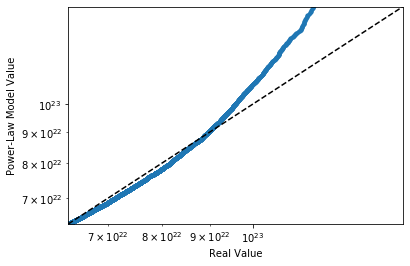

In [16]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_B1_000_after=plfit.plfit(flat_column_density_B1_000_after[(flat_column_density_B1_000_after>=1e22)], xmin = 6.34662801e+22, discrete = False, usefortran=False, verbose = True)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_B1_000_after.plotpdf() 
ax = plt.gca()
#ax.set_xlim(1e22, 1e23)
#ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_B1_000_after.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_B1_000_after.plotppf()
print('Plot 3 done')

The lowest value included in the power-law fit,  xmin: 5.00911e+22 
The number of values above xmin,  n(>xmin): 4300 
The derived power-law alpha (p(x)~x^-alpha) with MLE-derived error,  alpha: 12.3044 +/- 0.172391   
The log of the Likelihood (the maximized parameter; you minimized the negative log likelihood),  Log-Likelihood: -219005   
The KS-test statistic between the best-fit power-law and the data,  ks: 0.0870488  occurs with probability   p(ks): 4.23561e-29
Fitting done
Plot 1 done
Plot 2 done
Plot 3 done


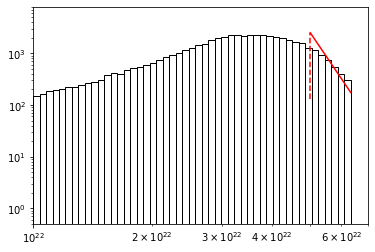

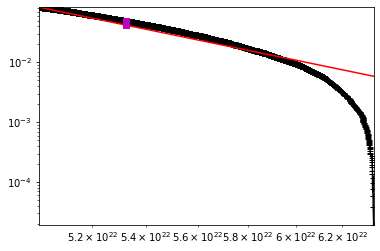

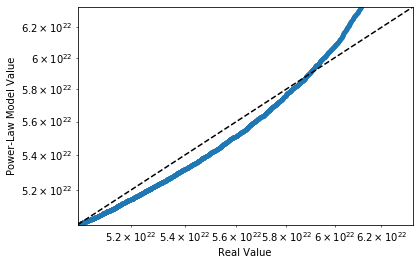

In [80]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_pig1=plfit.plfit(flat_column_density_pig1[(flat_column_density_pig1>=1e22)&(flat_column_density_pig1<=6.33758730e+22)], xmin = 5.00911164e+22, discrete = False, usefortran=False, verbose = True)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_pig1.plotpdf()
ax = plt.gca()
ax.set_xlim(1e22, 7e22)
ax.set_ylim(0.5, 8e3)
print('Plot 1 done')
figure(2)
myplfit_pig1.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_pig1.plotppf()
print('Plot 3 done')

In [6]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_pig2=plfit.plfit(flat_column_density_pig2, discrete = False, usefortran=False, verbose = True)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_pig2.plotpdf()
print('Plot 1 done')
figure(2)
myplfit_pig2.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_pig2.plotppf()
print('Plot 3 done')

NameError: name 'flat_column_density_pig2' is not defined

In [ ]:
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit_pig3=plfit.plfit(flat_column_density_pig3, discrete = False, usefortran=False, verbose = True)
print('Fitting done')
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit_pig3.plotpdf()
print('Plot 1 done')
figure(2)
myplfit_pig3.plotcdf()
print('Plot 2 done')
figure(3)
myplfit_pig3.plotppf()
print('Plot 3 done')

In [98]:
myplfit2._xmin, myplfit2._alpha, myplfit2._alphaerr

(4.5352406e+22, 4.480539735468525, 0.023963295202837853)

In [8]:
sigma = fits.open('/Users/hannahkoziol/Dropbox/Research/flux_trials/flux10_noise_final/flux10_B10snap_066_clean14_noise_finalfwhm.fits')
sigma_data = sigma[0].data
flat_sigma_data = sigma_data.flatten()
sigma_value = np.median(flat_sigma_data)
three_sigma_value = 3 * np.median(flat_sigma_data)
print(three_sigma_value)

3.947763851092593e+22


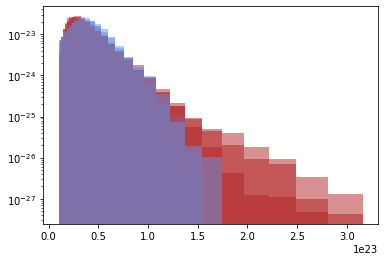

In [14]:
#Histograms of data
before_hist_B1_000 = plt.hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.5)
after_hist_B1_000 = plt.hist(flat_column_density_B1_000_after, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.5)
before_hist_B1_051 = plt.hist(flat_column_density_B1_051_before, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.5)
after_hist_B1_051 = plt.hist(flat_column_density_B1_051_after, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.5)
before_hist_B10_066 = plt.hist(flat_column_density_B10_066_before, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.5)
after_hist_B10_066 = plt.hist(flat_column_density_B10_066_after, bins=np.logspace(22, 23.5, 30), log=True, density = True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.5)

In [15]:
before_x_B1_000 = before_hist_B1_000[1]
before_mid_B1_000 = [(a + b) /2 for a,b in zip(before_x_B1_000[:-1], before_x_B1_000[1:])]
before_y_B1_000 = before_hist_B1_000[0]
x_before_x_B1_000 = np.array(before_mid_B1_000)
y_before_y_B1_000 = np.array(before_y_B1_000)

after_x_B1_000 = after_hist_B1_000[1]
after_mid_B1_000 = [(a + b) /2 for a,b in zip(after_x_B1_000[:-1], after_x_B1_000[1:])]
after_y_B1_000 = after_hist_B1_000[0]
x_after_x_B1_000 = np.array(after_mid_B1_000)
y_after_y_B1_000 = np.array(after_y_B1_000)

before_x_B1_051 = before_hist_B1_051[1]
before_mid_B1_051 = [(a + b) /2 for a,b in zip(before_x_B1_051[:-1], before_x_B1_051[1:])]
before_y_B1_051 = before_hist_B1_051[0]
x_before_x_B1_051 = np.array(before_mid_B1_051)
y_before_y_B1_051 = np.array(before_y_B1_051)

after_x_B1_051 = after_hist_B1_051[1]
after_mid_B1_051 = [(a + b) /2 for a,b in zip(after_x_B1_051[:-1], after_x_B1_051[1:])]
after_y_B1_051 = after_hist_B1_051[0]
x_after_x_B1_051 = np.array(after_mid_B1_051)
y_after_y_B1_051 = np.array(after_y_B1_051)

before_x_B10_066 = before_hist_B10_066[1]
before_mid_B10_066 = [(a + b) /2 for a,b in zip(before_x_B10_066[:-1], before_x_B10_066[1:])]
before_y_B10_066 = before_hist_B10_066[0]
x_before_x_B10_066 = np.array(before_mid_B10_066)
y_before_y_B10_066 = np.array(before_y_B10_066)

after_x_B10_066 = after_hist_B10_066[1]
after_mid_B10_066 = [(a + b) /2 for a,b in zip(after_x_B10_066[:-1], after_x_B10_066[1:])]
after_y_B10_066 = after_hist_B10_066[0]
x_after_x_B10_066 = np.array(after_mid_B10_066)
y_after_y_B10_066 = np.array(after_y_B10_066)

In [10]:
pig1_x = pig1_hist[1]
pig1_mid = [(a + b) /2 for a,b in zip(pig1_x[:-1], pig1_x[1:])]
pig1_y = pig1_hist[0]
x_pig1_x = np.array(pig1_mid)
y_pig1_y = np.array(pig1_y)

pig2_x = pig2_hist[1]
pig2_mid = [(a + b) /2 for a,b in zip(pig2_x[:-1], pig2_x[1:])]
pig2_y = pig2_hist[0]
x_pig2_x = np.array(pig2_mid)
y_pig2_y = np.array(pig2_y)

pig3_x = pig3_hist[1]
pig3_mid = [(a + b) /2 for a,b in zip(pig3_x[:-1], pig3_x[1:])]
pig3_y = pig3_hist[0]
x_pig3_x = np.array(pig3_mid)
y_pig3_y = np.array(pig3_y)

sgr_b2_x = sgr_b2_hist[1]
sgr_b2_mid = [(a + b) /2 for a,b in zip(sgr_b2_x[:-1], sgr_b2_x[1:])]
sgr_b2_y = sgr_b2_hist[0]
x_sgr_b2_x = np.array(sgr_b2_mid)
y_sgr_b2_y = np.array(sgr_b2_y)

brick_x = brick_hist[1]
brick_mid = [(a + b) /2 for a,b in zip(brick_x[:-1], brick_x[1:])]
brick_y = brick_hist[0]
x_brick_x = np.array(brick_mid)
y_brick_y = np.array(brick_y)

NameError: name 'pig1_hist' is not defined

In [138]:
#x_pig1_x[9:-11]

In [18]:
print(x_before_x_B1_051)

[1.06324085e+22 1.19772135e+22 1.34921117e+22 1.51986168e+22
 1.71209636e+22 1.92864521e+22 2.17258352e+22 2.44737556e+22
 2.75692376e+22 3.10562414e+22 3.49842874e+22 3.94091592e+22
 4.43936964e+22 5.00086862e+22 5.63338695e+22 6.34590727e+22
 7.14854836e+22 8.05270885e+22 9.07122909e+22 1.02185735e+23
 1.15110360e+23 1.29669713e+23 1.46070558e+23 1.64545809e+23
 1.85357841e+23 2.08802215e+23 2.35211872e+23 2.64961868e+23
 2.98474693e+23]


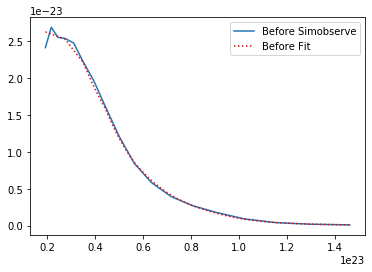

In [45]:
spl = UnivariateSpline(x_before_x_B1_051[5:-6], np.log(y_before_y_B1_051[5:-6]), k = 1, s = .03)
x_num_array = np.linspace(min(x_before_x_B1_051[5:-6]), max(x_before_x_B1_051[5:-6]), 500)
deriv = spl.derivative(1)
#deriv2 = spl.derivative(2)

plt.plot(x_before_x_B1_051[5:-6], y_before_y_B1_051[5:-6], label = 'Before Simobserve' )
plt.plot(x_num_array, np.exp(spl(x_num_array)), label = 'Before Fit', linestyle = ':', color = 'red')
plt.legend()
plt.show()

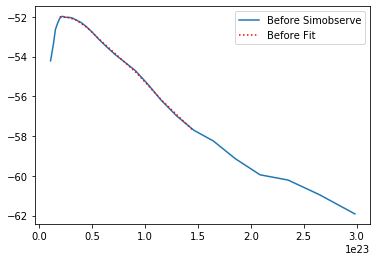

In [39]:
plt.plot(x_before_x_B1_051, np.log(y_before_y_B1_051), label = 'Before Simobserve' )
plt.plot(x_num_array, (spl(x_num_array)), label = 'Before Fit', linestyle = ':', color = 'red')
plt.legend()
plt.show()

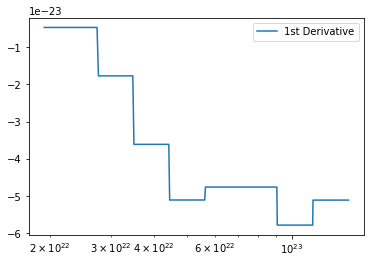

In [40]:
plt.plot(x_num_array, deriv(x_num_array), label = '1st Derivative')
plt.xscale('log')
plt.legend()
plt.show()

In [41]:
print(deriv(x_num_array))

[-4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24 -4.65127835e-24
 -4.65127835e-24 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23 -1.76846280e-23
 -1.76846280e-23 -1.76846

In [43]:
print(x_num_array[np.argwhere(deriv(x_num_array) < -4.65127835e-24)])

[[2.76709721e+22]
 [2.79250484e+22]
 [2.81791248e+22]
 [2.84332012e+22]
 [2.86872775e+22]
 [2.89413539e+22]
 [2.91954302e+22]
 [2.94495066e+22]
 [2.97035830e+22]
 [2.99576593e+22]
 [3.02117357e+22]
 [3.04658121e+22]
 [3.07198884e+22]
 [3.09739648e+22]
 [3.12280412e+22]
 [3.14821175e+22]
 [3.17361939e+22]
 [3.19902702e+22]
 [3.22443466e+22]
 [3.24984230e+22]
 [3.27524993e+22]
 [3.30065757e+22]
 [3.32606521e+22]
 [3.35147284e+22]
 [3.37688048e+22]
 [3.40228812e+22]
 [3.42769575e+22]
 [3.45310339e+22]
 [3.47851102e+22]
 [3.50391866e+22]
 [3.52932630e+22]
 [3.55473393e+22]
 [3.58014157e+22]
 [3.60554921e+22]
 [3.63095684e+22]
 [3.65636448e+22]
 [3.68177212e+22]
 [3.70717975e+22]
 [3.73258739e+22]
 [3.75799502e+22]
 [3.78340266e+22]
 [3.80881030e+22]
 [3.83421793e+22]
 [3.85962557e+22]
 [3.88503321e+22]
 [3.91044084e+22]
 [3.93584848e+22]
 [3.96125612e+22]
 [3.98666375e+22]
 [4.01207139e+22]
 [4.03747902e+22]
 [4.06288666e+22]
 [4.08829430e+22]
 [4.11370193e+22]
 [4.13910957e+22]
 [4.164517

In [11]:
def plotpdf(self,x=None,xmin=None,alpha=None,nbins=30,dolog=True,dnds=False,
            drawstyle='steps-post', histcolor='k', plcolor='r', **kwargs):
        """
        Plots PDF and powerlaw.

        kwargs is passed to pylab.hist and pylab.plot
        """
        if not(x): x=self.data
        if not(xmin): xmin=self._xmin
        if not(alpha): alpha=self._alpha

        x=np.sort(x)
        n=len(x)

        plt.gca().set_xscale('log')
        plt.gca().set_yscale('log')

        if dnds:
            hb = plt.hist(x,bins=np.logspace(log10(min(x)),log10(max(x)),nbins, histtype = 'step'))
            h = hb[0]
            b = hb[1]
            db = hb[1][1:]-hb[1][:-1]
            h = h/db
            plt.plot(b[:-1],h,drawstyle=drawstyle,color=histcolor,**kwargs)
            #alpha -= 1
        elif dolog:
            hb = plt.hist(x,bins=np.logspace(log10(min(x)),log10(max(x)),nbins),log=True,fill=False,edgecolor='none', histtype = 'step', **kwargs)
            alpha -= 1
            h,b=hb[0],hb[1]
        else:
            hb = plt.hist(x,bins=np.linspace((min(x)),(max(x)),nbins),fill=False,edgecolor='none', histtype = 'none', **kwargs)
            h,b=hb[0],hb[1]
        # plotting points are at the center of each bin
        b = (b[1:]+b[:-1])/2.0

        q = x[x>=xmin]
        px = (alpha-1)/xmin * (q/xmin)**(-alpha)

        # Normalize by the median ratio between the histogram and the power-law
        # The normalization is semi-arbitrary; an average is probably just as valid
        plotloc = (b>xmin)*(h>0)
        norm = np.median( h[plotloc] / ((alpha-1)/xmin * (b[plotloc]/xmin)**(-alpha))  )
        px = px*norm

        plotx = np.linspace(q.min(),q.max(),1000)
        ploty = (alpha-1)/xmin * (plotx/xmin)**(-alpha) * norm

        #pylab.loglog(q,px,'r',**kwargs)
        plt.loglog(plotx,ploty,color=plcolor,**kwargs)

        axlims = plt.axis()
        plt.vlines(xmin,axlims[2],max(px),colors=plcolor,linestyle='dashed')

        plt.gca().set_xlim(min(x),max(x))

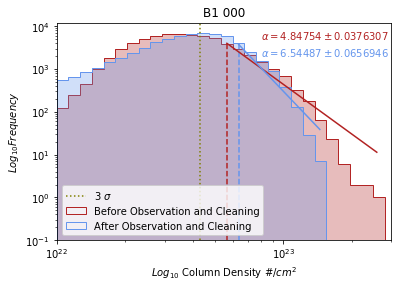

In [17]:
fig, ax = plt.subplots()
plt.hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.99)
before_hist = plt.hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), log=True, color='firebrick', alpha=0.3)
plt.hist(flat_column_density_B1_000_after, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.99)
after_hist = plt.hist(flat_column_density_B1_000_after, bins=np.logspace(22, 23.5, 30), log=True, color='cornflowerblue', alpha=0.3)
#plt.axvline(x = sigma_value, label = r'$\sigma$', linestyle = ':', color = 'orange')
plt.axvline(x = 4.29635e22, label = r'3 $\sigma$', linestyle = ':', color = 'olive')
ax.set_xscale('log')
plt.xlabel('$Log_{10}$ Column Density $\#/cm^2$')
plt.ylabel('$Log_{10} Frequency$')
ax.set_title('B1 000')
plt.legend(loc = 'lower left')
plotpdf(myplfit_B1_000_before, plcolor='firebrick')
plotpdf(myplfit_B1_000_after, plcolor='cornflowerblue')
plt.text(8e22, 5e3, r'$\alpha = 4.84754 \pm 0.0376307$', color = 'firebrick')
plt.text(8e22, 2e3, r'$\alpha = 6.54487 \pm 0.0656946$', color = 'cornflowerblue')
plt.xlim(1e22, 3e23)
plt.show()

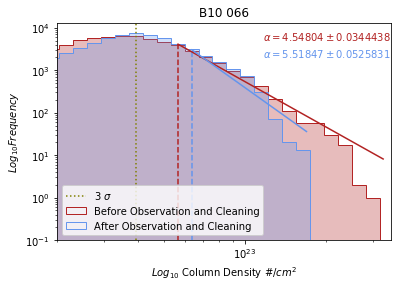

In [18]:
fig, ax = plt.subplots()
plt.hist(flat_column_density_B10_066_before, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.99)
before_hist = plt.hist(flat_column_density_B10_066_before, bins=np.logspace(22, 23.5, 30), log=True, color='firebrick', alpha=0.3)
plt.hist(flat_column_density_B10_066_after, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.99)
after_hist = plt.hist(flat_column_density_B10_066_after, bins=np.logspace(22, 23.5, 30), log=True, color='cornflowerblue', alpha=0.3)
#plt.axvline(x = sigma_value, label = r'$\sigma$', linestyle = ':', color = 'orange')
plt.axvline(x = three_sigma_value, label = r'3 $\sigma$', linestyle = ':', color = 'olive')
ax.set_xscale('log')
plt.xlabel('$Log_{10}$ Column Density $\#/cm^2$')
plt.ylabel('$Log_{10} Frequency$')
ax.set_title('B10 066')
plt.legend(loc = 'lower left')
plotpdf(myplfit_B10_066_before_xmin, plcolor='firebrick')
plotpdf(myplfit_B10_066_after_xmin, plcolor='cornflowerblue')
plt.text(1.17e23, 5e3, r'$\alpha = 4.54804 \pm 0.0344438$', color = 'firebrick')
plt.text(1.17e23, 2e3, r'$\alpha = 5.51847 \pm 0.0525831$', color = 'cornflowerblue')
plt.xlim(2e22, 3.5e23)
plt.show()

In [87]:
print(norm)

9664.047449377993


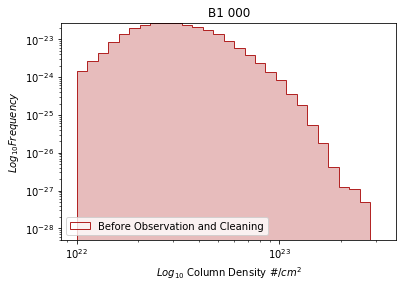

In [114]:
fig, ax = plt.subplots()
plt.hist(flat_column_density2, bins=np.logspace(22, 23.5, 30), histtype = 'step', density = True, log=True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.99)
plt.hist(flat_column_density2, bins=np.logspace(22, 23.5, 30), density = True, log=True, color='firebrick', alpha=0.3)
#plt.hist(flat_column_density, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "After Observation and Cleaning", color='cornflowerblue', alpha=0.99)
#after_hist = plt.hist(flat_column_density, bins=np.logspace(22, 23.5, 30), log=True, color='cornflowerblue', alpha=0.3)
#plt.axvline(x = sigma_value, label = r'$\sigma$', linestyle = ':', color = 'orange')
#plt.axvline(x = three_sigma_value, label = r'3 $\sigma$', linestyle = ':', color = 'olive')
ax.plot(x[:-1], 1e-23*((fit(afit, 1e-23*x[:-1]))), color = 'blue', linestyle = ':')
ax.set_xscale('log')
plt.xlabel('$Log_{10}$ Column Density $\#/cm^2$')
plt.ylabel('$Log_{10} Frequency$')
ax.set_title('B1 000')
plt.legend(loc = 'lower left')
plt.show()

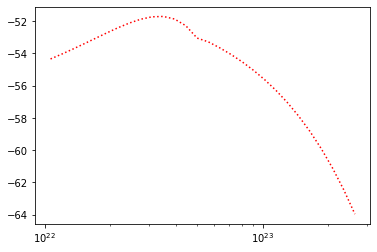

In [115]:
fig, ax = plt.subplots()
ax.plot(x[:-1], ((fit(afit, 1e-23*x[:-1]))), color = 'red', linestyle = ':')
ax.set_xscale('log')

#

In [265]:
#CMZoom Data

In [4]:
distance        = 8178. # distance to GC; (GRAVITY collaboration 2019)
Wave            = (3.0e8/226.0e9) # define the wavelength from the SMA dust continuum frequency. 
Wave0           = 1.3e-3
k0              = 0.899
nu              = 3.e08/Wave
nu0             = 3.e08/Wave0
beta            = 1.75
Kappag2d        = k0*((nu/nu0)**beta)
g2d             = 100.0
Kappa           = Kappag2d / g2d # this kappa is the dust opacity, it's kind of complicated where it comes from, but if you're interested I can find you some stuff about it!
mu              = 2.8 # This mu is the mean atomic weight. 
hplanck = 6.626176e-34 #Joule seconds
clight = 3e8 #m/s
kboltzmann = 1.380649e-23 #Joule/Kelvin
mh = 1.6737236e-27

In [5]:
def planck_wave(Wave, Temp):
    planck_conv_wave = 1.e-26 *clight /Wave**2.0
    planck = ((2.0*hplanck*clight**2.0)/(Wave**5.0))*(1.0/(np.exp((hplanck*clight)/(Wave*kboltzmann*Temp))-1.0))
    planck = planck/planck_conv_wave
    return planck

In [6]:
def column_density(Wave, Temp, Kappa, Flux_Density, mu):
    B = planck_wave(Wave, Temp)
    N = Flux_Density / (mu * (mh*1.e3) * Kappa * B)
    return N

In [7]:
mosaic = fits.open('/Users/hannahkoziol/Dropbox/Research/CMZoom_continuum_pbcor_feathered.fits')
mask = fits.open('/Users/hannahkoziol/Dropbox/Research/CMZoom_Mask_new.fits')
mosaic_data = mosaic[0].data
mask_data = mask[0].data
mosaic_flat = mosaic_data.flatten()
mask_flat = mask_data.flatten()

In [8]:
pig1_mask = np.argwhere(mask_flat == 20)
pig1 = mosaic_flat[pig1_mask]
pig2_mask = np.argwhere(mask_flat == 21)
pig2 = mosaic_flat[pig2_mask]
pig3_mask = np.argwhere(mask_flat == 23)
pig3 = mosaic_flat[pig3_mask]
sgr_b2_mask = np.argwhere(mask_flat == 9)
sgr_b2 = mosaic_flat[sgr_b2_mask]
brick_mask = np.argwhere(mask_flat == 18)
brick = mosaic_flat[brick_mask]
cloud1_mask = np.argwhere(mask_flat == 1)
cloud1 = mosaic_flat[cloud1_mask]

In [9]:
column_density_pig1_array = column_density(Wave, 25, Kappa, pig1, mu)
flat_column_density_pig1 = column_density_pig1_array.flatten()
column_density_pig2_array = column_density(Wave, 25, Kappa, pig2, mu)
flat_column_density_pig2 = column_density_pig2_array.flatten()
column_density_pig3_array = column_density(Wave, 25, Kappa, pig3, mu)
flat_column_density_pig3 = column_density_pig3_array.flatten()
column_density_sgr_b2_array = column_density(Wave, 25, Kappa, sgr_b2, mu)
flat_column_density_sgr_b2 = column_density_sgr_b2_array.flatten()
column_density_brick_array = column_density(Wave, 25, Kappa, brick, mu)
flat_column_density_brick = column_density_brick_array.flatten()
column_density_cloud1_array = column_density(Wave, 25, Kappa, cloud1, mu)
flat_column_density_cloud1 = column_density_cloud1_array.flatten()

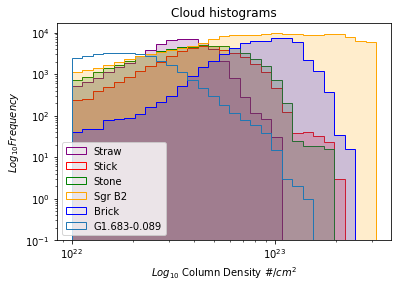

In [11]:
fig, ax = plt.subplots()
pig1_hist = plt.hist(flat_column_density_pig1, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Straw", color='purple', alpha=0.99)
pig1_hist = plt.hist(flat_column_density_pig1, bins=np.logspace(22, 23.5, 30), log=True, color='purple', alpha=0.2)
pig2_hist = plt.hist(flat_column_density_pig2, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Stick", color = 'red', alpha=0.99)
pig2_hist = plt.hist(flat_column_density_pig2, bins=np.logspace(22, 23.5, 30), log=True, color = 'red', alpha=0.2)
pig3_hist = plt.hist(flat_column_density_pig3, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Stone", color = 'green', alpha=0.99)
pig3_hist = plt.hist(flat_column_density_pig3, bins=np.logspace(22, 23.5, 30), log=True, color = 'green', alpha=0.2)
sgr_b2_hist = plt.hist(flat_column_density_sgr_b2, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Sgr B2", color = 'orange', alpha=0.99)
sgr_b2_hist = plt.hist(flat_column_density_sgr_b2, bins=np.logspace(22, 23.5, 30), log=True, color = 'orange', alpha=0.2)
brick_hist = plt.hist(flat_column_density_brick, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Brick", color = 'blue', alpha=0.99)
brick_hist = plt.hist(flat_column_density_brick, bins=np.logspace(22, 23.5, 30), log=True, color = 'blue', alpha=0.2)
cloud1_hist = plt.hist(flat_column_density_cloud1, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "G1.683-0.089", alpha=0.99)
#plt.hist(flat_column_density2, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "Before Observation and Cleaning", color='firebrick', alpha=0.99)
#before_hist = plt.hist(flat_column_density2, bins=np.logspace(22, 23.5, 30), log=True, color='firebrick', alpha=0.2)
#plt.hist(flat_column_density, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "B1 000 After Observation and Cleaning", color='cornflowerblue', alpha=0.99)
#after_hist = plt.hist(flat_column_density, bins=np.logspace(22, 23.5, 30), log=True, color='cornflowerblue', alpha=0.2)
ax.set_xscale('log')
plt.xlabel('$Log_{10}$ Column Density $\#/cm^2$')
plt.ylabel('$Log_{10} Frequency$')
plt.title('Cloud histograms')
plt.legend(loc = 'lower left')
plt.show()

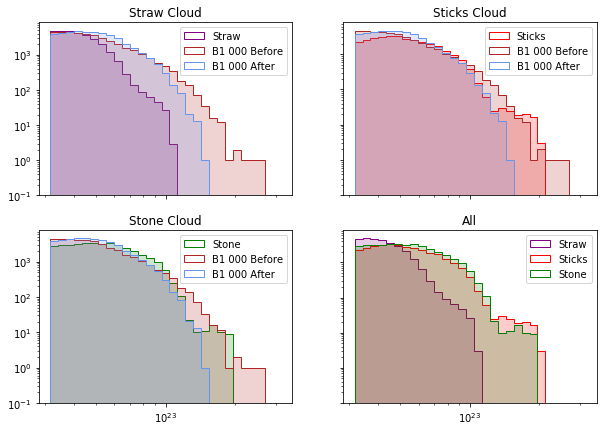

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(flat_column_density_pig1, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "Straw", color='purple', alpha=0.99)
axs[0, 0].hist(flat_column_density_pig1, bins=np.logspace(22.5, 23.5, 30), log=True, color='purple', alpha=0.2)
axs[0, 0].hist(flat_column_density_B1_000_before, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "B1 000 Before", color='firebrick', alpha=0.99)
axs[0,0].hist(flat_column_density_B1_000_before, bins=np.logspace(22.5, 23.5, 30), log=True, color='firebrick', alpha=0.2)
axs[0,0].hist(flat_column_density_B1_000_after, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "B1 000 After", color='cornflowerblue', alpha=0.99)
axs[0,0].hist(flat_column_density_B1_000_after, bins=np.logspace(22.5, 23.5, 30), log=True, color='cornflowerblue', alpha=0.2)
axs[0,0].set_xscale('log')
axs[0, 0].set_title('Straw Cloud')
axs[0, 1].hist(flat_column_density_pig2, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "Sticks", color = 'red', alpha=0.99)
axs[0,1].hist(flat_column_density_pig2, bins=np.logspace(22.5, 23.5, 30), log=True, color = 'red', alpha=0.2)
axs[0, 1].hist(flat_column_density_B1_000_before, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "B1 000 Before", color='firebrick', alpha=0.99)
axs[0,1].hist(flat_column_density_B1_000_before, bins=np.logspace(22.5, 23.5, 30), log=True, color='firebrick', alpha=0.2)
axs[0,1].hist(flat_column_density_B1_000_after, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "B1 000 After", color='cornflowerblue', alpha=0.99)
axs[0,1].hist(flat_column_density_B1_000_after, bins=np.logspace(22.5, 23.5, 30), log=True, color='cornflowerblue', alpha=0.2)
axs[0, 1].set_title('Sticks Cloud')
axs[0,1].set_xscale('log')
axs[1, 0].hist(flat_column_density_pig3, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "Stone", color = 'green', alpha=0.99)
axs[1,0].hist(flat_column_density_pig3, bins=np.logspace(22.5, 23.5, 30), log=True, color = 'green', alpha=0.2)
axs[1, 0].hist(flat_column_density_B1_000_before, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "B1 000 Before", color='firebrick', alpha=0.99)
axs[1,0].hist(flat_column_density_B1_000_before, bins=np.logspace(22.5, 23.5, 30), log=True, color='firebrick', alpha=0.2)
axs[1,0].hist(flat_column_density_B1_000_after, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "B1 000 After", color='cornflowerblue', alpha=0.99)
axs[1,0].hist(flat_column_density_B1_000_after, bins=np.logspace(22.5, 23.5, 30), log=True, color='cornflowerblue', alpha=0.2)
axs[1, 0].set_title('Stone Cloud')
axs[1,0].set_xscale('log')
axs[1,1].hist(flat_column_density_pig1, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "Straw", color='purple', alpha=0.99)
axs[1,1].hist(flat_column_density_pig1, bins=np.logspace(22.5, 23.5, 30), log=True, color='purple', alpha=0.2)
axs[1,1].hist(flat_column_density_pig2, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "Sticks", color = 'red', alpha=0.99)
axs[1,1].hist(flat_column_density_pig2, bins=np.logspace(22.5, 23.5, 30), log=True, color = 'red', alpha=0.2)
axs[1,1].hist(flat_column_density_pig3, bins=np.logspace(22.5, 23.5, 30), histtype = 'step', log=True, label = "Stone", color = 'green', alpha=0.99)
axs[1,1].hist(flat_column_density_pig3, bins=np.logspace(22.5, 23.5, 30), log=True, color = 'green', alpha=0.2)
#axs[1,1].hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "B1 000 Before", color='firebrick', alpha=0.99)
#axs[1,1].hist(flat_column_density_B1_000_before, bins=np.logspace(22, 23.5, 30), log=True, color='firebrick', alpha=0.2)
#axs[1,1].hist(flat_column_density_B1_000_after, bins=np.logspace(22, 23.5, 30), histtype = 'step', log=True, label = "B1 000 After", color='cornflowerblue', alpha=0.99)
#axs[1,1].hist(flat_column_density_B1_000_after, bins=np.logspace(22, 23.5, 30), log=True, color='cornflowerblue', alpha=0.2)
axs[1,1].set_xscale('log')

axs[1, 1].set_title('All')
#axs.set_xscale('log')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
#plt.legend(loc='center', bbox_to_anchor=(1, 1))
#for ax in axs.flat:
#    ax.set(xlabel='$Log_{10}$ Column Density $\#/cm^2$', ylabel='$Log_{10} Frequency$')

for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(10,7)
plt.show()

In [27]:
cnames = np.array(['',
                 '',
                 '',
                 'The Dancer Cloud',
                 '',
                 '',
                 '',
                 'The Chela Cloud',
                 'Sgr B2',
                 'Sgr B2 SE',
                 'Dust Ridge Clouds E\\&F',
                 'Dust Ridge Cloud D',
                 '',
                 'Dust Ridge Cloud C',
                 'Dust Ridge Cloud B',
                 '',
                 '',
                 'The Brick',
                 '',
                 'The Straw Cloud',
                 'The Sticks Cloud',
                 '',
                 'The Stone Cloud',
                 '',
                 '',
                 'The 20 km/s cloud',
                 'Sgr A* region',
                 'The 50 km/s cloud',
                 '',
                 '',
                 '',
                 '',
                 '',
                 'Sgr C',
                 '',
                 ''])
print(cnames)

['' '' '' 'The Dancer Cloud' '' '' '' 'The Chela Cloud' 'Sgr B2'
 'Sgr B2 SE' 'Dust Ridge Clouds E\\&F' 'Dust Ridge Cloud D' ''
 'Dust Ridge Cloud C' 'Dust Ridge Cloud B' '' '' 'The Brick' ''
 'The Straw Cloud' 'The Sticks Cloud' '' 'The Stone Cloud' '' ''
 'The 20 km/s cloud' 'Sgr A* region' 'The 50 km/s cloud' '' '' '' '' ''
 'Sgr C' '' '']


In [28]:
np.argwhere(cnames == 'The Brick')

array([[17]])

In [29]:
region_names = np.array(['G1.683-0.089',
                      'G1.670-0.130',
                      'G1.651-0.050',
                      'G1.602+0.018',
                      'G1.085-0.027',
                      'G1.038-0.074',
                      'G0.891-0.048',
                      'G0.714-0.100',
                      'G0.699-0.028',
                      'G0.619+0.012',
                      'G0.489+0.010',
                      'G0.412+0.052',
                      'G0.393-0.034',
                      'G0.380+0.050',
                      'G0.340+0.055',
                      'G0.326-0.085',
                      'G0.316-0.201',
                      'G0.253+0.016',
                      'G0.212-0.001',
                      'G0.145-0.086',
                      'G0.106-0.082',
                      'G0.070-0.035',
                      'G0.068-0.075',
                      'G0.054+0.027',
                      'G0.014+0.021',
                      'G0.001-0.058',
                      'G359.948-0.052',
                      'G359.889-0.093',
                      'G359.865+0.022',
                      'G359.863-0.069',
                      'G359.734+0.002',
                      'G359.648-0.133',
                      'G359.611+0.018',
                      'G359.615-0.243',
                      'G359.484-0.132',
                      'G359.137+0.031'])